|Assignment  Step |		Index |	Experiment# |	Dataset A |	Dataset B|
|---|---|---|---|---|---|
|1		|	1 |	1	|	kmeans(A)	| kmeans(B) |
|1		|	2 | 3	|	em(A)	|	em(B)  |
|2		|	3 |	5	|	PCA(A)	|	PCA(B) |
|2		|	4 |	7	|	ICA(A)	|	ICA(B) |
|2		|	5 |	9	|	RP(A)	|	RP(B) |
|2		|	6 |	11	|	CYO(A)	|	CYO(B) |
|3		|	7 |	13	|	kmeans(PCA(A)) |	kmeans(PCA(B)) |
|3		|	8 |	15	|	kmeans(ICA(A)) |	kmeans(ICA(B)) |
|3		|	9 |	17	|	kmeans(RP(A)) |	kmeans(RP(B)) |
|3		|	10 |	19	|	kmeans(CYO(A)) |	kmeans(CYO(B)) |
|3		|	11 |	21	|	em(PCA(A)) |	em(PCA(B)) |
|3		|	12 |	23	|	em(ICA(A)) |	em(ICA(B)) |
|3		|	13 |	25	|	em(RP(A)) |	em(RP(B)) |
|3		|	14 |	27	|	em(CYO(A)) |	em(CYO(B)) |
|4		|	15	 | 29	|	Nnet(PCA(A)) |     |
|4		|	16 |	30	|	Nnet(ICA(A))  |   |
|4		|	17 |	31	|	Nnet(RP(A)) | |
|4		|	18 |	32	|	Nnet(CYO(A)) |  |
|5		|	19 |	33	|	Nnet(kmeans(A)) | |   
|5		|	20 |	34	|	Nnet(em(A))  | |

In [85]:
# set plots inline for ipython
%matplotlib inline

# general python imports
from time import time

# Standard scientific Python imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# import datasets, preprocessing, clustering & dimensionality reduction algs
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection 
from sklearn.manifold import isomap

# import the neural network stuff
from sknn.mlp import Classifier, Layer

In [5]:
# globals
n_row, n_col = 2, 3
n_components = n_row * n_col

In [6]:
# function to plot different decompositions of the data
def plot_gallery(title, images, n_col=n_col, n_row=n_row, image_shape = (64, 64)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [37]:
# Load datasets
digits = datasets.load_digits()
faces = datasets.fetch_olivetti_faces(shuffle = True)

# normalize digits
digits_X = StandardScaler().fit_transform(digits.data)

# normalize olvetti faces
faces_X = StandardScaler().fit_transform(faces.data)

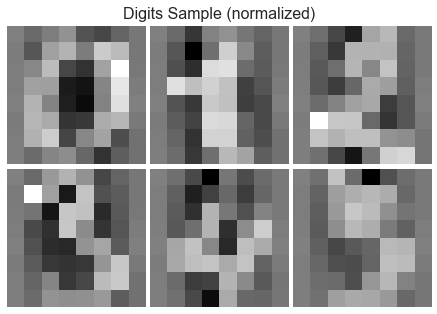

In [45]:
# show example digits
plot_gallery("Digits Sample (normalized)", digits_X[:n_components], image_shape=(8,8))

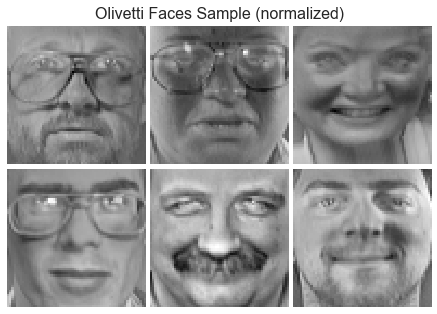

In [38]:
# show some example faces
plot_gallery("Olivetti Faces Sample (normalized)", faces_X[:n_components])

In [86]:
decompositions = [
    ('Principal Components Analysis', PCA(n_components=n_components, whiten=True)),
    ('Independent Components Analysis', FastICA(n_components=n_components, whiten=True)),
    ('Randome Projections', GaussianRandomProjection(n_components=n_components))
]

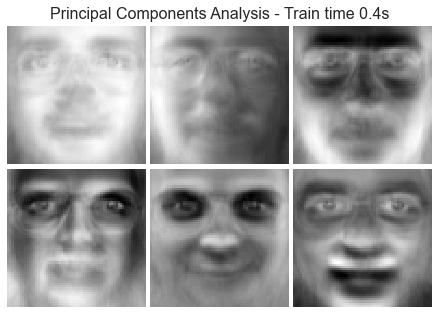

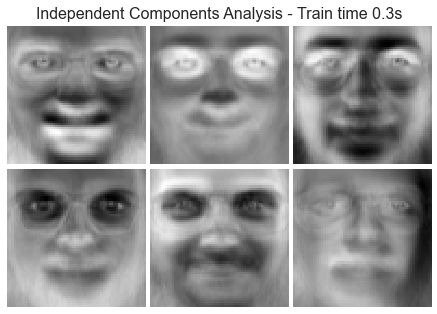

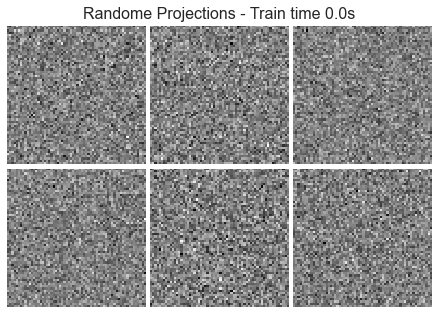

In [88]:
for title, decomposition in decompositions:
    t0 = time()
    decomposition.fit(faces_X)
    train_time = (time() - t0)

    plot_gallery('%s - Train time %.1fs' % (title, train_time),
                 decomposition.components_[:n_components])